In [1]:
import os

import numpy as np
#import opencv

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from PIL import Image
from IPython.display import display

import torch
import torch.nn as nn

from torch.utils.data import DataLoader
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.optim.lr_scheduler import StepLR
#from torchsummary import summary
from tqdm import tqdm

In [2]:
data_path = r'C:\Users\HP\OneDrive\Documents\Github\DeepLearning_Model\chest_xray\chest_xray'

In [3]:
class_name = ['NORMAL', 'PNEUMONIA']
def get_list_files(dirName):
    '''
    input - directory location
    output - list the files in the directory
    '''
    files_list = os.listdir(dirName)
    return files_list

files_list_normal_train = get_list_files(data_path+'/train/'+class_name[0])
files_list_pneu_train = get_list_files(data_path+'/train/'+class_name[1])

files_list_normal_test = get_list_files(data_path+'/test/'+class_name[0])
files_list_pneu_test = get_list_files(data_path+'/test/'+class_name[1])

In [4]:
print("Number of training images in Normal {}".format(len(files_list_normal_train)))
print("Number of training images in Pneumonia {}".format(len(files_list_pneu_train)))
print("Number of test images in Normal {}".format(len(files_list_normal_test)))
print("Number of test images in Pneumonia {}".format(len(files_list_pneu_test)))

Number of training images in Normal 1349
Number of training images in Pneumonia 3883
Number of test images in Normal 234
Number of test images in Pneumonia 390


(1970, 2338)


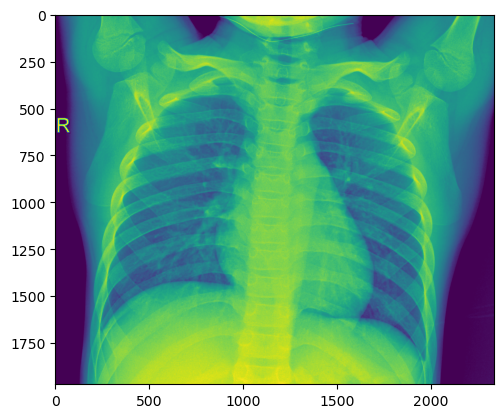

In [5]:
rand_img_no = np.random.randint(0, len(files_list_normal_train))
img = data_path +'/train/NORMAL/'+ files_list_normal_train[rand_img_no]
print(plt.imread(img).shape)

img = mpimg.imread(img)
imgplot = plt.imshow(img)
plt.show()

(824, 1184)


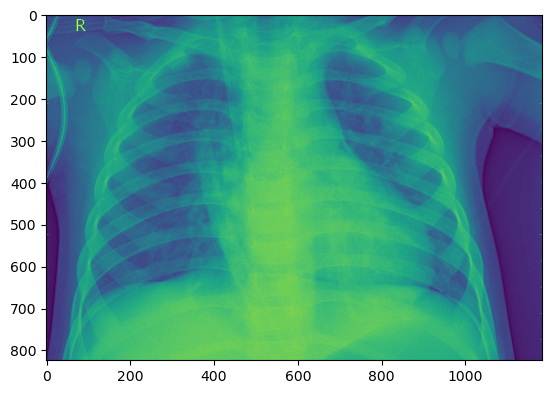

In [6]:
rand_img_no = np.random.randint(0, len(files_list_pneu_train))
img = data_path +'/train/PNEUMONIA/'+ files_list_pneu_train[rand_img_no]
print(plt.imread(img).shape)

img = mpimg.imread(img)
imgplot = plt.imshow(img)
plt.show()

In [7]:
train_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

train_data = datasets.ImageFolder(os.path.join(data_path, 'train'), transform = train_transform)
test_data = datasets.ImageFolder(os.path.join(data_path, 'test'), transform=test_transform)


train_loader =DataLoader(train_data,
                         batch_size= 16,
                         shuffle= True,
                         pin_memory= True)

test_loader = DataLoader(test_data,
                         batch_size= 1,
                         shuffle= False,
                         pin_memory= True)


class_names = train_data.classes

print(class_names)
print(f'Number of train images : {len(train_data)}')
print(f'Number of test images: {len(test_data)}')

['NORMAL', 'PNEUMONIA']
Number of train images : 5232
Number of test images: 624


In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Input Block
        self.convblock1 = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=8, kernel_size=(3, 3),
        padding=0, bias=False),
        nn.ReLU(),
        #nn.BatchNorm2d(4)
        )
        self.pool11 = nn.MaxPool2d(2, 2)
        # CONVOLUTION BLOCK
        self.convblock2 = nn.Sequential(
        nn.Conv2d(in_channels=8, out_channels=16, kernel_size=(3, 3),
        padding=0, bias=False),
        nn.ReLU(),
        #nn.BatchNorm2d(16)
        )
        # TRANSITION BLOCK
        self.pool22 = nn.MaxPool2d(2, 2)
        self.convblock3 = nn.Sequential(
        nn.Conv2d(in_channels=16, out_channels=10, kernel_size=(1, 1), padding=0, bias=False),
        #nn.BatchNorm2d(10),
        nn.ReLU()
        )
        self.pool33 = nn.MaxPool2d(2, 2)
        # CONVOLUTION BLOCK
        self.convblock4 = nn.Sequential(
        nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(3, 3), padding=0, bias=False),
        nn.ReLU(),
        #nn.BatchNorm2d(10)
        )
        self.convblock5 = nn.Sequential(
        nn.Conv2d(in_channels=10, out_channels=32, kernel_size=(1, 1), padding=0, bias=False),
        #nn.BatchNorm2d(32),
        nn.ReLU(),
        )
        self.convblock6 = nn.Sequential(
        nn.Conv2d(in_channels=32, out_channels=10, kernel_size=(1, 1), padding=0, bias=False),
        nn.ReLU(),
        #nn.BatchNorm2d(10),
        )
        self.convblock7 = nn.Sequential(
        nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(3, 3), padding=0, bias=False),
        nn.ReLU(),
        #nn.BatchNorm2d(10)
        )
        self.convblock8 = nn.Sequential(
        nn.Conv2d(in_channels=10, out_channels=32, kernel_size=(1, 1), padding=0, bias=False),
        #nn.BatchNorm2d(32),
        nn.ReLU()
        )
        self.convblock9 = nn.Sequential(
        nn.Conv2d(in_channels=32, out_channels=10, kernel_size=(1, 1), padding=0, bias=False),
        nn.ReLU(),
        #nn.BatchNorm2d(10),
        )
        self.convblock10 = nn.Sequential(
        nn.Conv2d(in_channels=10, out_channels=14, kernel_size=(3, 3), padding=0, bias=False),
        nn.ReLU(),
        #nn.BatchNorm2d(14),
        )
        self.convblock11 = nn.Sequential(
        nn.Conv2d(in_channels=14, out_channels=16, kernel_size=(3, 3), padding=0, bias=False),
        nn.ReLU(),
        #nn.BatchNorm2d(16),
        )
        # OUTPUT BLOCK
        self.gap = nn.Sequential(
        nn.AvgPool2d(kernel_size=4)
        )
        self.convblockout = nn.Sequential(
        nn.Conv2d(in_channels=16, out_channels=2, kernel_size=(4, 4), padding=0, bias=False),
        )
        
    def forward(self, x):
        x = self.convblock1(x)
        x = self.pool11(x)
        x = self.convblock2(x)
        x = self.pool22(x)
        x = self.convblock3(x)
        x = self.pool33(x)
        x = self.convblock4(x)
        x = self.convblock5(x)
        x = self.convblock6(x)
        x = self.convblock7(x)
        x = self.convblock8(x)
        x = self.convblock9(x)
        x = self.convblock10(x)
        x = self.convblock11(x)
        x = self.gap(x)
        x = self.convblockout(x)
        x = x.view(-1, 2)
        return F.log_softmax(x, dim=-1)